# Problem Statement: Concrete Strength Prediction

 

## Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

 

## Resources Available 

The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

### GitHub: https://github.com/wbasnight/AIML

## Steps and Tasks:

### Exploratory Data Quality Report Reflecting the Following:

1. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)

2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)

3. Feature Engineering techniques(10 marks)
    1. Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) 
Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
    2. Get the data model ready and do a train test split.
    3. . Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 

### Creating the Model and Tuning It:

1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)
 

### Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


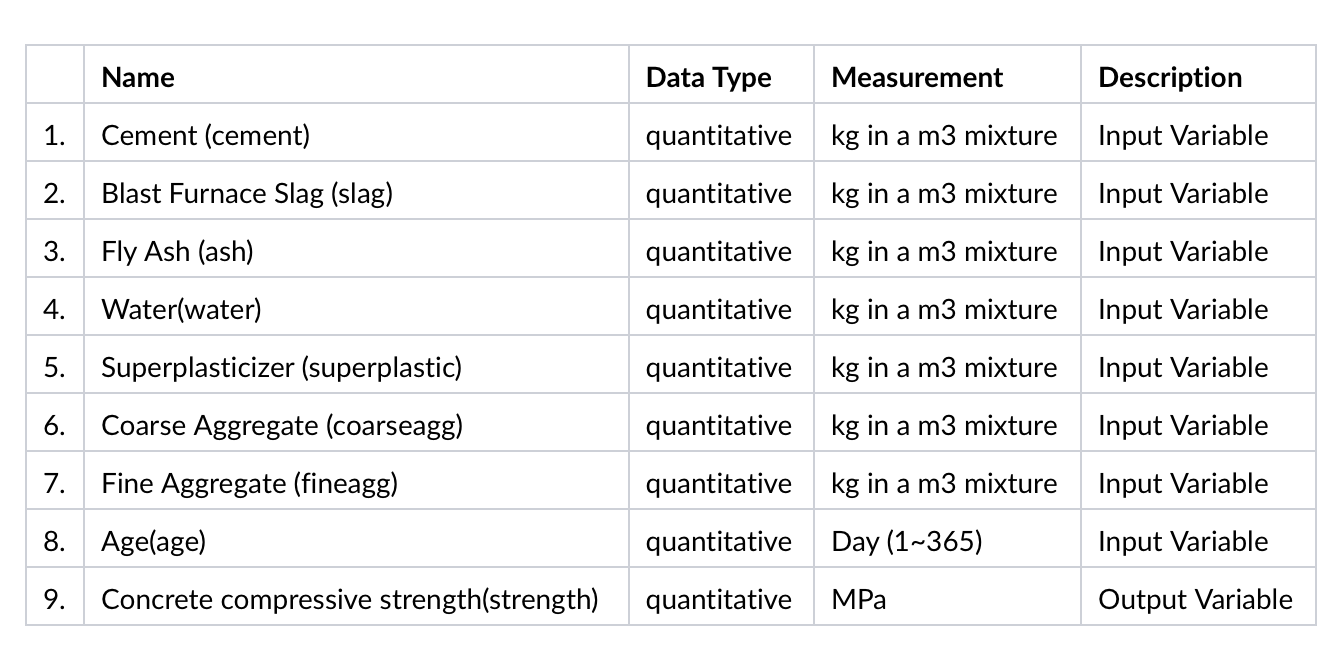



In [1]:
#Prevents displaying warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
#Loading the data file
ConcreteData = pd.read_csv("concrete.csv")

#check the file - display the view first 5 rows of concrete.csv
ConcreteData.head() 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Exploratory Data Quality Report Reflecting the Following:

1. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)

In [4]:
#Generate pandas profiling report of the data - See PPReport.html for report
from pandas_profiling import ProfileReport
prof = ProfileReport(ConcreteData)
prof.to_file(output_file='ConcretePPReport.html')

In [5]:
# Checking for any null values in the data
ConcreteData.isnull().values.any() 

False

In [6]:
# displays the shape (the number of rows and columns) of the data in the concrete dataframe.
ConcreteData.shape

(1030, 9)

In [7]:
# displays the calculations of basic statisical data
ConcreteData.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
# displays the column info (datatypes) for concrete.csv
ConcreteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# Convering float64 datatypes to int64
ConcreteData = ConcreteData.astype(int)

In [10]:
# displays the column info (datatypes) after conversion to int64
ConcreteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cement        1030 non-null   int64
 1   slag          1030 non-null   int64
 2   ash           1030 non-null   int64
 3   water         1030 non-null   int64
 4   superplastic  1030 non-null   int64
 5   coarseagg     1030 non-null   int64
 6   fineagg       1030 non-null   int64
 7   age           1030 non-null   int64
 8   strength      1030 non-null   int64
dtypes: int64(9)
memory usage: 72.5 KB


In [11]:
ConcreteData.nunique()

cement          180
slag            123
ash              89
water            81
superplastic     25
coarseagg       187
fineagg         192
age              14
strength         80
dtype: int64

### Exploratory Data Quality Report Reflecting the Following:

2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)

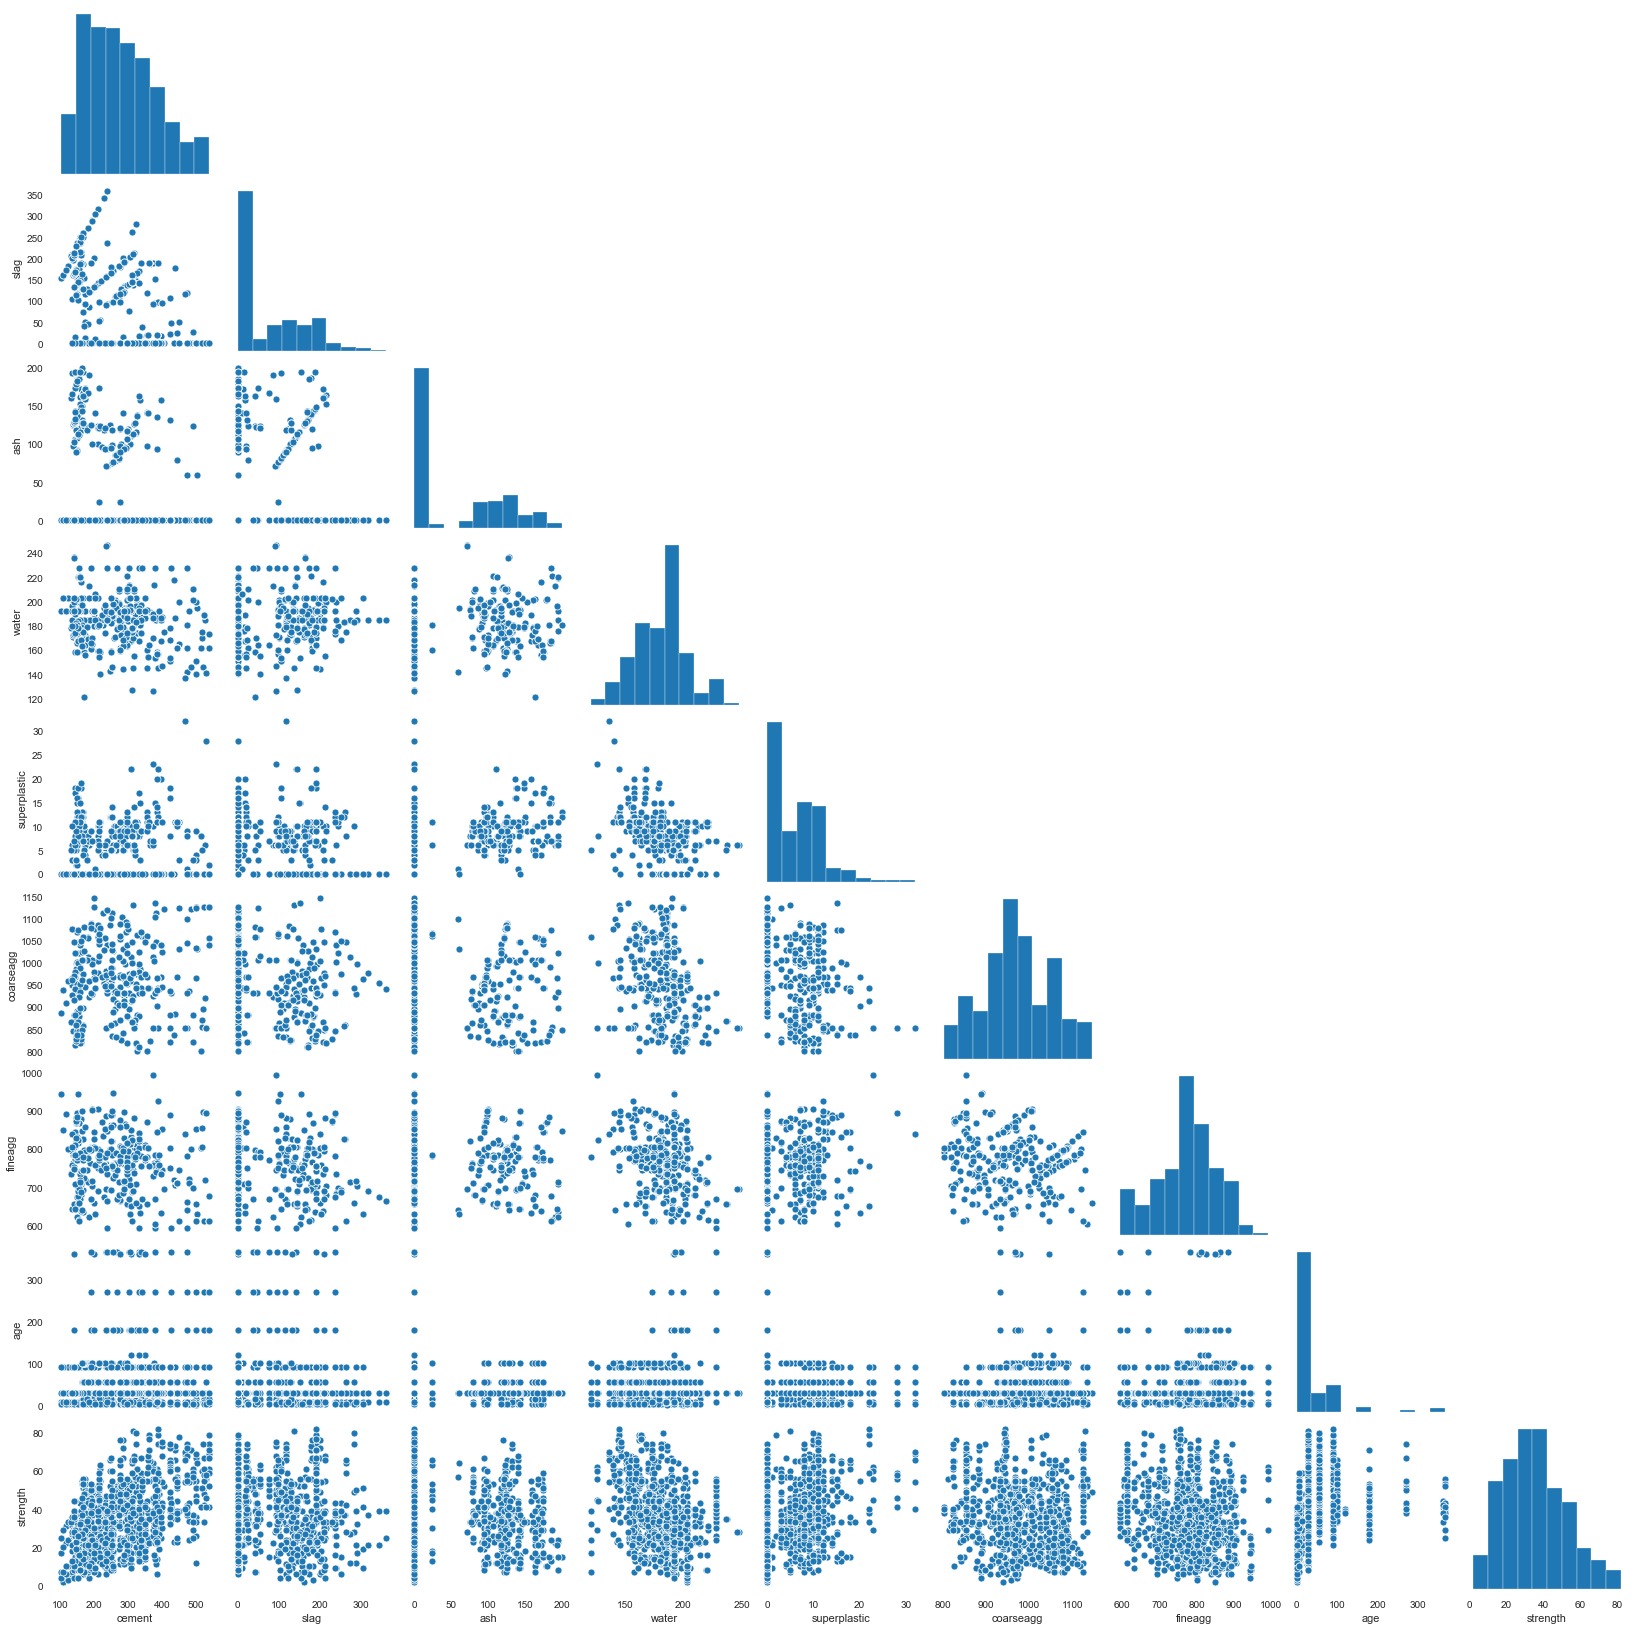

In [12]:
#pairplot of the data
sns.pairplot(ConcreteData, diag_kind='auto', corner=True)

<AxesSubplot:ylabel='strength'>

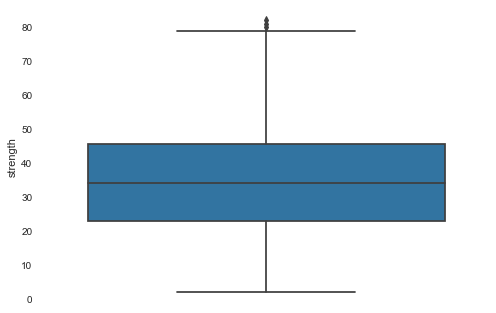

In [13]:
sns.boxplot(y=ConcreteData["strength"])

### Exploratory Data Quality Report Reflecting the Following:

3. Feature Engineering techniques(10 marks)
    1. Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.

There was not a need to drop any columns as they all are components to the strength of the concrete.  Also there are zeros in the data but leaving them as zeros because that column ingredient may not be needed in the concrete mixture for the overall strength.

### Exploratory Data Quality Report Reflecting the Following:

3. Feature Engineering techniques(10 marks)
    2. Get the data model ready and do a train test split.


In [14]:
#split into 3 sets- train, test, validation

X = ConcreteData.drop("strength" , axis=1)
y = ConcreteData.pop("strength")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)


In [15]:
#Checking the data split
print("{0:0.2f}% data is in training set".format((len(X_train)/len(ConcreteData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(ConcreteData.index)) * 100))
print("{0:0.2f}% data is in validation set".format((len(X_val)/len(ConcreteData.index)) * 100))

52.43% data is in training set
30.00% data is in test set
17.57% data is in validation set


### Exploratory Data Quality Report Reflecting the Following:

3. Feature Engineering techniques(10 marks)
    3.  Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

In [17]:
# Building the pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 

pipe = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=5)), ('clf', LinearRegression())]) 
pipe.fit(X_train, y_train) 
y_predict = pipe.predict(X_test)
print('Test Accuracy: {0:0.2f}%'.format(pipe.score(X_test, y_test)*100))



Test Accuracy: 48.78%


### Creating the Model and Tuning It:

1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

In [18]:
#Build and fit Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X, y)
y_predict = gbcl.predict(X_test)

In [19]:
# Printing the model accuracy results
print('Training Data Accuracy: {0:0.2f}%'.format( gbcl.score(X_train, y_train) *100))
print ('Test Data Accuracy: {0:0.2f}%'.format(gbcl.score(X, y)*100))

# Variables for the model comparisions
BoostAccuracy = '{0:0.2f}%'.format(gbcl.score(X_train , y_train)*100)
BoostTest = '{0:0.2f}%'.format(gbcl.score(X, y)*100)


Training Data Accuracy: 82.22%
Test Data Accuracy: 80.00%


In [20]:
#Build and fit Bagging Model
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples= 1.0, bootstrap=False)
bgcl = bgcl.fit(X, y)
y_predict = bgcl.predict(X_test)

In [21]:
# Printing the model accuracy results
print('Training Data Accuracy: {0:0.2f}%'.format( bgcl.score(X_train, y_train) *100))
print ('Test Data Accuracy: {0:0.2f}%'.format(bgcl.score(X, y)*100))

# Variables for the model comparisions
BagAccuracy = '{0:0.2f}%'.format(bgcl.score(X_train , y_train)*100)
BagTest = '{0:0.2f}%'.format(bgcl.score(X, y)*100)

Training Data Accuracy: 98.33%
Test Data Accuracy: 98.35%


In [22]:
#Build and fit Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 60, random_state=99)
rfcl = rfcl.fit(X, y)
y_predict = rfcl.predict(X_test)

In [23]:
# Printing the model accuracy results
print('Training Data Accuracy: {0:0.2f}%'.format( rfcl.score(X_train, y_train) *100))
print ('Test Data Accuracy: {0:0.2f}%'.format(rfcl.score(X, y)*100))

# Variables for the model comparisions
RFAccuracy = '{0:0.2f}%'.format(rfcl.score(X_train , y_train)*100)
RFTest = '{0:0.2f}%'.format(rfcl.score(X, y)*100)

Training Data Accuracy: 98.70%
Test Data Accuracy: 98.35%


In [24]:
# Evaluating models using kfold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=42)

In [25]:
results = cross_val_score(gbcl,X, y, cv=kfold) *100
results

array([17.47572816, 18.93203883, 20.87378641, 17.96116505, 17.96116505])

In [26]:
results = cross_val_score(bgcl,X, y, cv=kfold) *100
results

array([20.87378641, 25.72815534, 26.21359223, 23.30097087, 24.27184466])

In [27]:
results = cross_val_score(rfcl,X, y, cv=kfold) *100
results

array([20.38834951, 25.24271845, 26.69902913, 22.81553398, 25.24271845])

## Creating the Model and Tuning It:

2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [28]:
# setting up parameters for RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 9),
              "min_samples_split": sp_randint(1, 9),
              "min_samples_leaf": sp_randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [29]:
# run RandomSearch on Random Forest model
samples = 10 
randomCV = RandomizedSearchCV(rfcl, param_distributions=param_dist, n_iter=samples)

In [30]:
# fitting to model and displaying mean scores
randomCV.fit(X, y)

randomCV.cv_results_['mean_test_score']


array([0.08737864, 0.08640777, 0.1961165 , 0.07572816, 0.07864078,
       0.19805825, 0.08932039, 0.08446602, 0.2184466 , 0.07378641])

In [31]:
#Building and Displaying matrix of the models comparision
TDAccuracy=[BoostAccuracy,BagAccuracy,RFAccuracy]
TDTestAcc = [BoostTest,BagTest,RFTest]

col={'Training Data Accuracy':TDAccuracy,'Test Data Accuracy':TDTestAcc}
models=['Gradient Boosting','Bagging','Random Forest']
dfModels=pd.DataFrame(data=col,index=models)
dfModels

,Training Data Accuracy,Test Data Accuracy
Gradient Boosting,82.22%,80.00%
Bagging,98.33%,98.35%
Random Forest,98.70%,98.35%
